<a href="https://colab.research.google.com/github/maeve70/medical-insurance-project/blob/main/MedicalInsuranceCostsCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's explore this medical insurance costs csv file and see if there are any potential correlations between regions, ages, number of children and see how those variables might affect insurance costs. this is a WIP.

In [ ]:
import csv
import pandas as pd
from scipy import stats
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import warnings
warnings.filterwarnings("ignore")

grabbing the csv from github (raw)

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/maeve70/random_stuff/main/insurance.csv")

Let's see what the file looks like.

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.shape

(1338, 7)

In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
insurance.isnull().sum() #no nulls! yay


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance.isnull().values.any()

False

In [ ]:
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


You can see the means for each column above:
age: 39, bmi, 30.6, children: 1, charges: 13270.42

In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance['age'].mean()

39.20702541106129

In [ ]:
insurance['age'].median()

39.0

In [ ]:
insurance['charges1'].mean().round(2)

13270.42

In [ ]:
insurance['charges'].median().round(2)

9382.03

In [ ]:
#titanic[["Age", "Fare"]].median()
#titanic[["Sex", "Age"]].groupby("Sex").mean()

insurance[["age", "sex", 'charges']].groupby('sex').mean()

,age,charges
sex,,
female,39.503021,12569.578844
male,38.917160,13956.751178


The outliers will skew the actual mean, so let's look at the median of the data set.

In [ ]:
insurance["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
insurance[["age", "sex", 'charges']].groupby('sex').median()

,age,charges
sex,,
female,40.0,9412.96250
male,39.0,9369.61575


In [ ]:
insurance[["smoker", 'charges']].groupby('smoker').mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


In [ ]:
insurance[["smoker", 'charges']].groupby('smoker').median()

,charges
smoker,
no,7345.40530
yes,34456.34845


In [ ]:
#insurance[["children", "region"]].groupby("region").mean()

In [ ]:
#insurance[["sex", "children"]].groupby('sex').count()
#this tells us nothing b/c it counts all rows, even if the number of kids is 0

In [ ]:
insurance["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
insurance["children"].count()

In [ ]:
insurance["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
insurance["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
insurance[['region', 'charges']].groupby('region').mean()

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [ ]:
insurance[['region', 'charges']].groupby('region').median()

,charges
region,
northeast,10057.652025
northwest,8965.795750
southeast,9294.131950
southwest,8798.593000


In [ ]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
insurance[['smoker', 'charges']].groupby('smoker').median().round(2)

,charges
smoker,
no,7345.41
yes,34456.35


In [ ]:
sns.color_palette('magma')

[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

In [ ]:
sns.set_palette("magma")

There are outliers in the data for charges, let's see what that looks like. Which is why we'd look at the median, rather than the mean.

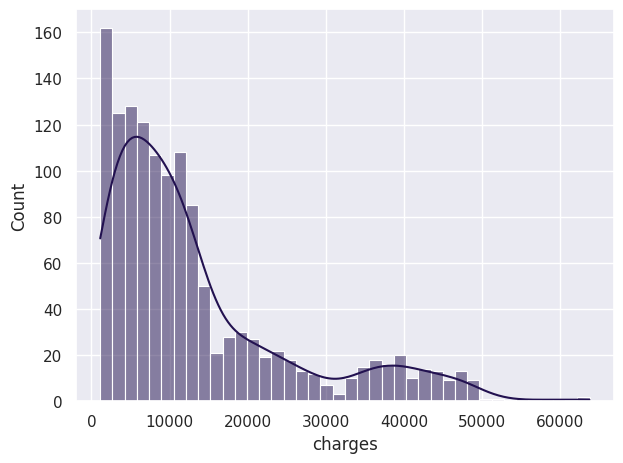

In [ ]:
sns.histplot(insurance.charges, kde=True, bins=40);

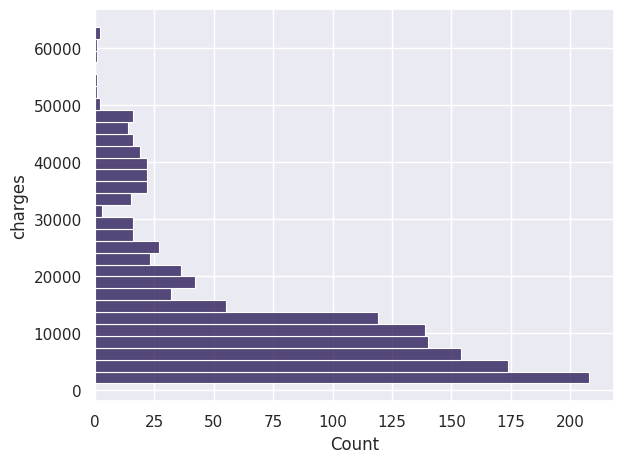

In [ ]:
sns.histplot(y = 'charges', data=insurance); #use x or y too

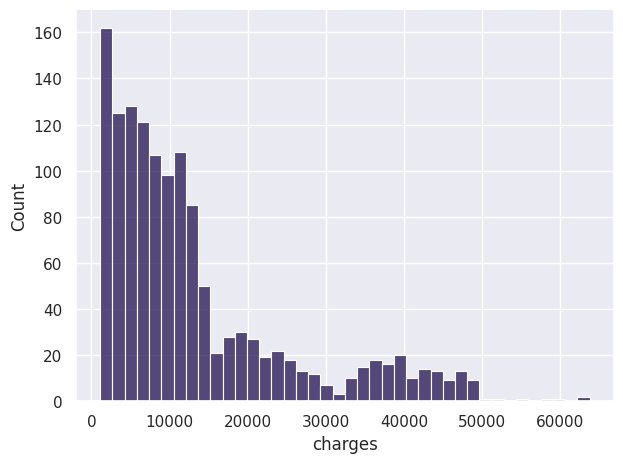

In [ ]:
sns.histplot(x = 'charges', bins = 40,
             stat='count', data=insurance);

<Axes: xlabel='sex', ylabel='charges'>

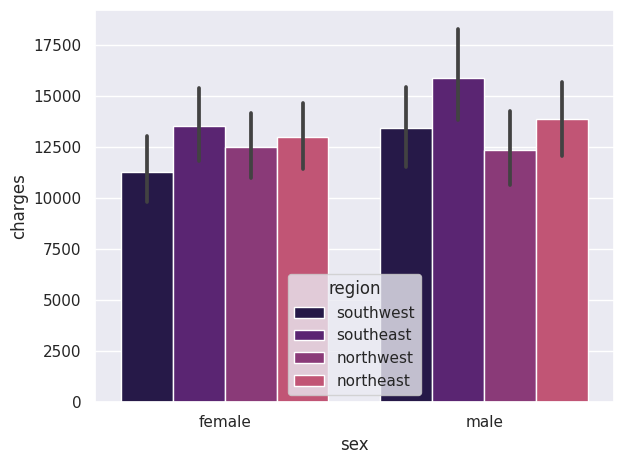

In [ ]:
sns.barplot(x='sex', y='charges', hue='region',data=insurance)

In [ ]:
smokers = insurance.iloc[(insurance['smoker']=='yes').values]
smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [ ]:
#df = df.iloc[(df['col']== whatever).values]

women_only = insurance.iloc[(insurance['sex']=='female').values]
women_only.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


Children analysis (partial)

In [ ]:
women_only['children'].value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: children, dtype: int64

total number of women who are parents and have children: 373

In [ ]:
women_only['children'].median()

1.0

In [ ]:
#insurance[["sex", "children"]].groupby('sex').count()
women_only[['children', 'region']].groupby('region').count()

,children
region,
northeast,161
northwest,164
southeast,175
southwest,162


In [ ]:
men_only = insurance.iloc[(insurance['sex']=='male').values]
men_only.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


In [ ]:
men_only["children"].value_counts()

0    285
1    166
2    121
3     80
4     14
5     10
Name: children, dtype: int64

men in dataset who are parents & numbers of children 391

In [ ]:
men_only['children'].sum()

754

In [ ]:
men_only[['children', 'region']].groupby('region').count()

,children
region,
northeast,163
northwest,161
southeast,189
southwest,163


BMI's by sex and regions

In [ ]:
#women_only[['children', 'region']].groupby('region').count()
women_only[['bmi', 'region']].groupby('region').mean()

,bmi
region,
northeast,29.324317
northwest,29.277957
southeast,32.671257
southwest,30.060494


In [ ]:
men_only[['bmi', 'region']].groupby('region').mean()

,bmi
region,
northeast,29.024540
northwest,29.120155
southeast,33.990000
southwest,31.129448


Mean charges by sex, region,

In [ ]:
insurance['charges'].mean()

13270.422265141257

In [ ]:
insurance['charges'].median()

9382.033

In [ ]:
women_only['charges'].mean()

12569.578843835347

In [ ]:
women_only[['charges', 'region']].groupby('region').mean()

,charges
region,
northeast,12953.203151
northwest,12479.870397
southeast,13499.669243
southwest,11274.411264


In [ ]:
women_only[['charges', 'region', 'children']].groupby('region').mean()

,charges,children
region,,
northeast,12953.203151,1.006211
northwest,12479.870397,1.115854
southeast,13499.669243,1.051429
southwest,11274.411264,1.123457


In [ ]:
men_only['charges'].mean()

13956.751177721893

In [ ]:
men_only[['charges', 'region']].groupby('region').mean()

,charges
region,
northeast,13854.005374
northwest,12354.119575
southeast,15879.617173
southwest,13412.883576


In [ ]:
insurance['age'].median()

39.0

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Smokers in the data set

In [ ]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
#AL_NL_batting99 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 1999).values]

smokers = insurance.iloc[(insurance['smoker']=='yes').values]
smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [ ]:
#men_only[['children', 'region']].groupby('region').count()
smokers.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [ ]:
smokers['charges'].mean()

32050.23183153284

In [ ]:
smokers['sex'].value_counts()

male      159
female    115
Name: sex, dtype: int64

In [ ]:
#insurance[["smoker", 'charges']].groupby('smoker').mean()
smokers[['sex', 'region', 'charges']].groupby('region').mean()

,charges
region,
northeast,29673.536473
northwest,30192.003182
southeast,34844.996824
southwest,32269.063494


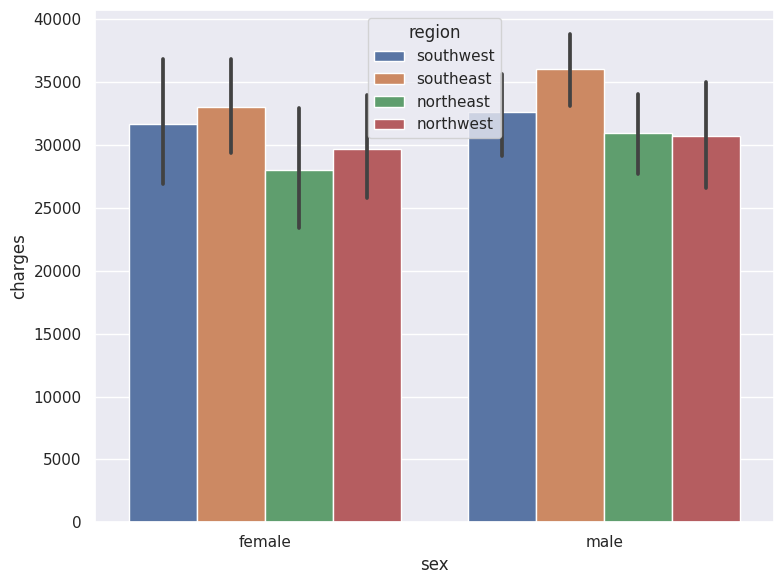

In [ ]:
plt.figure(figsize= (8, 6))
sns.barplot(x="sex", y="charges", hue="region", data=smokers)
plt.show()

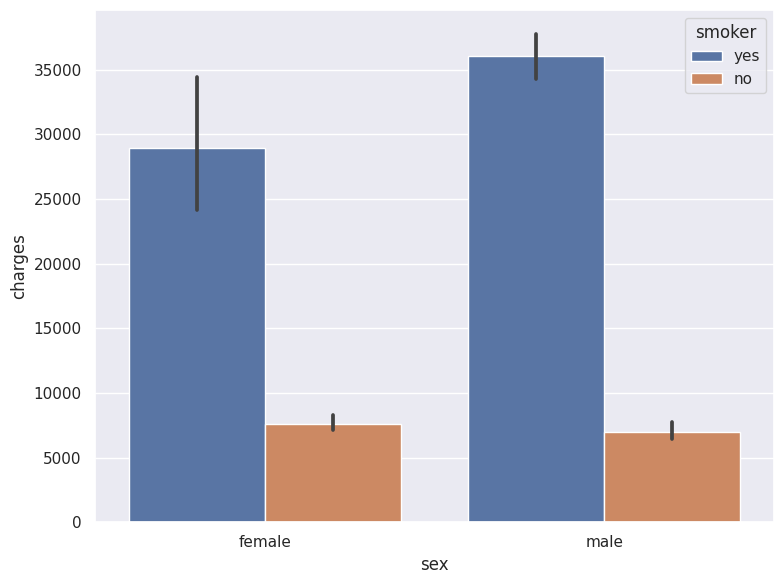

In [ ]:
plt.figure(figsize= (8, 6))
sns.barplot(x="sex", y="charges", hue="smoker", estimator='median', data=insurance)
plt.show()

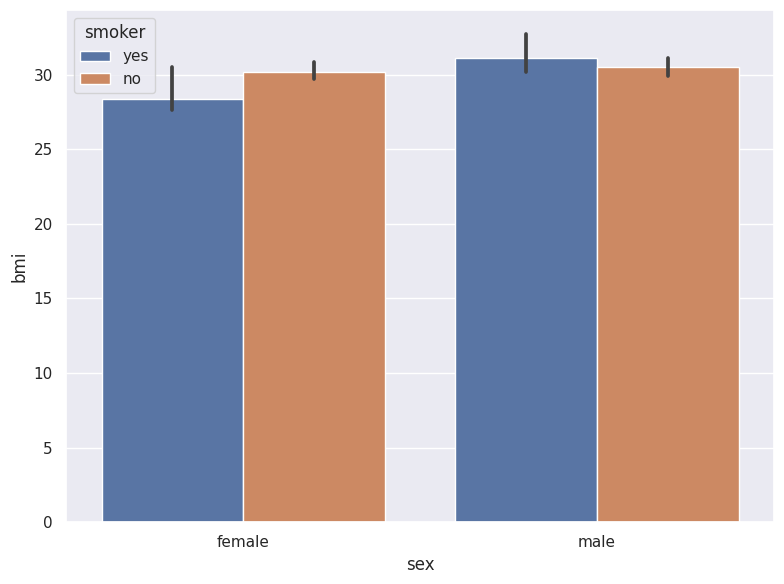

In [ ]:
plt.figure(figsize= (8, 6))
sns.barplot(x="sex", y="bmi", hue="smoker", estimator = 'median', data=insurance)
plt.show()

In [ ]:
non_smokers = insurance.iloc[(insurance['smoker']=='no').values]
non_smokers.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [ ]:
non_smokers.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [ ]:
non_smokers['sex'].value_counts()

female    547
male      517
Name: sex, dtype: int64

In [ ]:
non_smokers['charges'].describe()

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

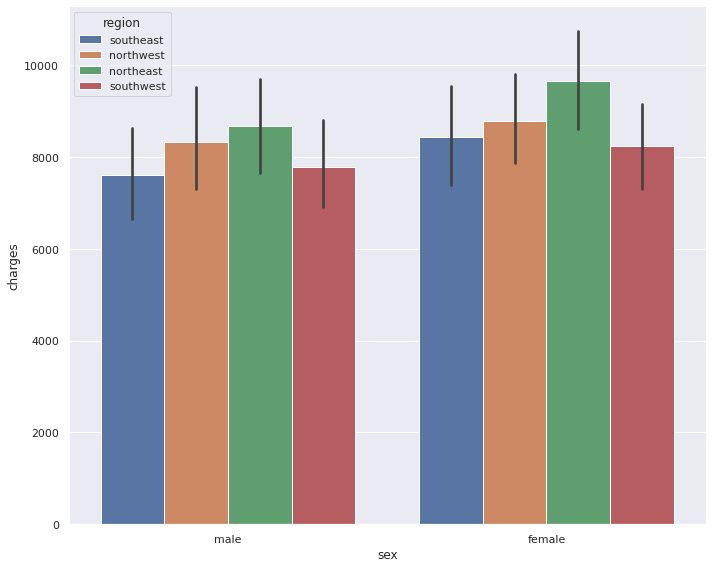

In [ ]:
plt.figure(figsize= (10, 8))
sns.barplot(x="sex", y="charges", hue="region", data=non_smokers)
plt.show()

What are some stats about the charges column?

In [ ]:
insurance['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

That's a large mean!

change data type for charges.

In [ ]:
insurance['charges'] = insurance['charges'].astype(np.int64)
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884
1,18,male,33.77,1,no,southeast,1725


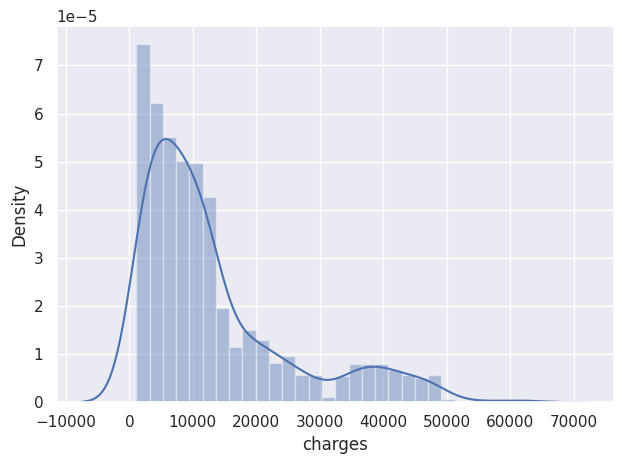

In [ ]:
sns.distplot(insurance['charges'])
plt.show()

Heavily right skewed....hm.

In [ ]:
plt.scatterplot()

In [ ]:
insurance['charges'].skew()

1.5158827393851704

Let's round the charges col to two decimal places using np.ceil
df['DataFrame column'].apply(np.ceil)


In [ ]:
insurance['charges'].apply(np.ceil)

0       16884.0
1        1725.0
2        4449.0
3       21984.0
4        3866.0
         ...   
1333    10600.0
1334     2205.0
1335     1629.0
1336     2007.0
1337    29141.0
Name: charges, Length: 1338, dtype: float64

In [ ]:
insurance['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

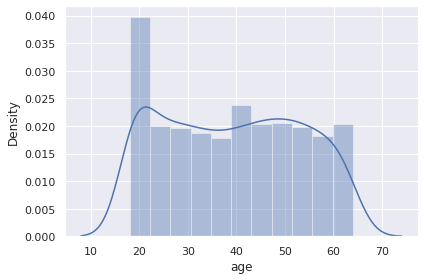

In [ ]:
sns.distplot(insurance['age'])
plt.show()

In [ ]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

What are the stats for BMI? (even though BMI isn't a valid health indicator. It's a bs number).

In [ ]:
insurance['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [ ]:
insurance.head()

In [ ]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
insurance.ndim

2

In [ ]:
#for line plots, tweak the x axis w/np.arange:
#plt.xticks(np.arange(0, len(df), 15), fontsize=12)
#plt.yticks(fontsize=12)

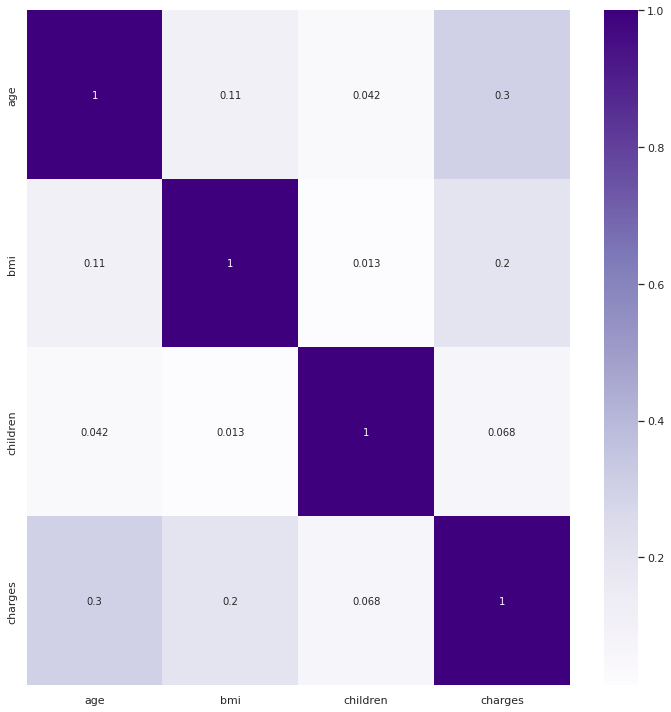

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(insurance.corr(), annot=True, cmap='Purples')
plt.show()

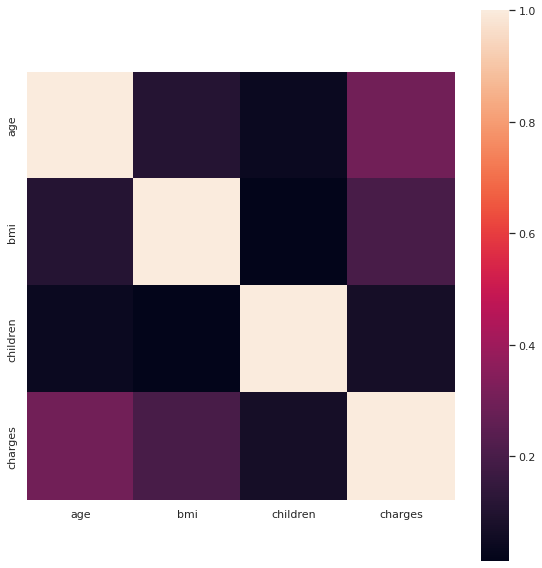

In [ ]:
corremat = insurance.corr()
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corremat, vmax= 1.0, square = True)
plt.show()

more on age in relation to the other variables

In [ ]:
insurance.corr(method='pearson')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299009
bmi,0.109272,1.000000,0.012759,0.198342
children,0.042469,0.012759,1.000000,0.067999
charges,0.299009,0.198342,0.067999,1.000000


In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


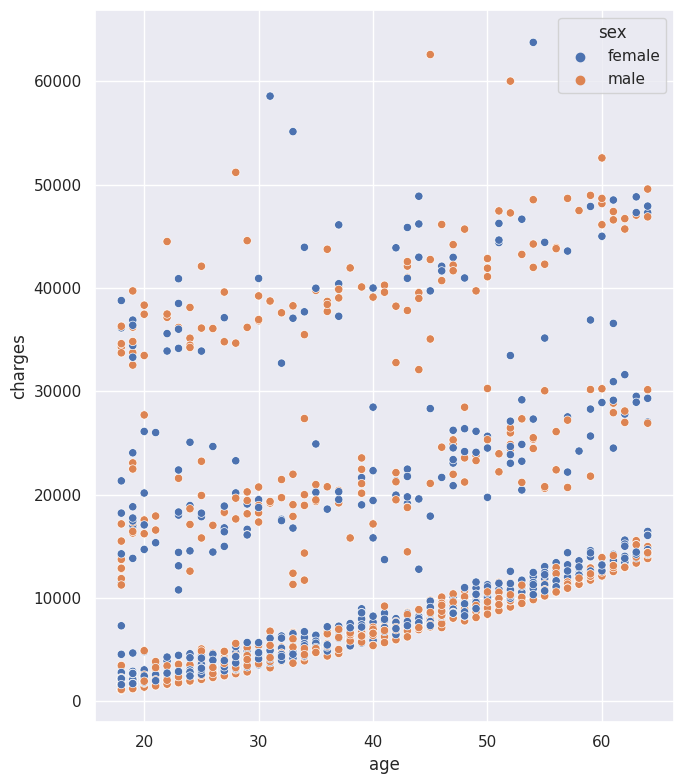

In [ ]:
plt.figure(figsize= (7, 8))
sns.scatterplot(x="age", y="charges", hue="sex", data=insurance)
plt.show()


Plot shows a positive linear relationship between age and charges

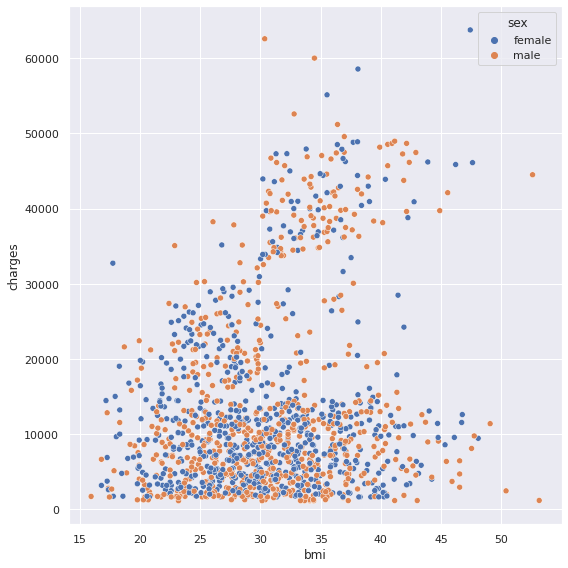

In [ ]:
plt.figure(figsize= (8, 8))
sns.scatterplot(x="bmi", y="charges", hue="sex", data=insurance)
plt.show()

In [ ]:
insurance_genders= insurance['sex'].value_counts()
print(insurance_genders)

male      676
female    662
Name: sex, dtype: int64


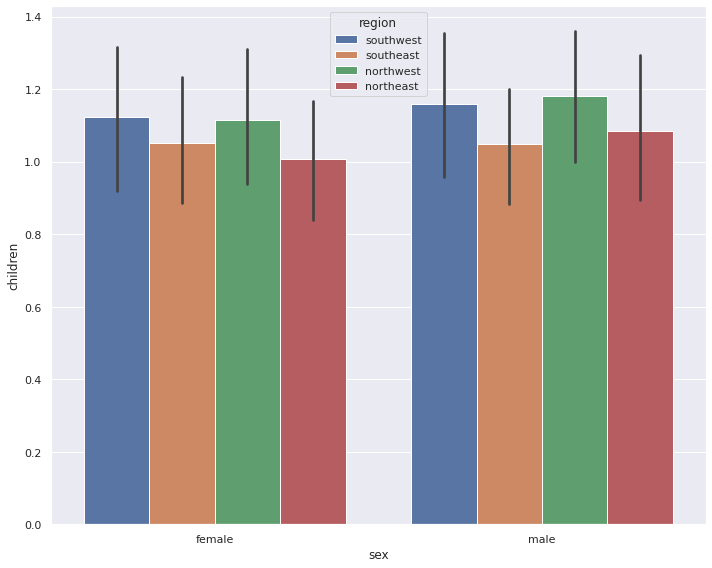

In [ ]:
#children by sex of parent per region
plt.figure(figsize= (10, 8))
sns.barplot(x="sex", y="children", hue="region", data=insurance)
plt.show()

Breakdown by charges, number of children and region (women who are parents df)

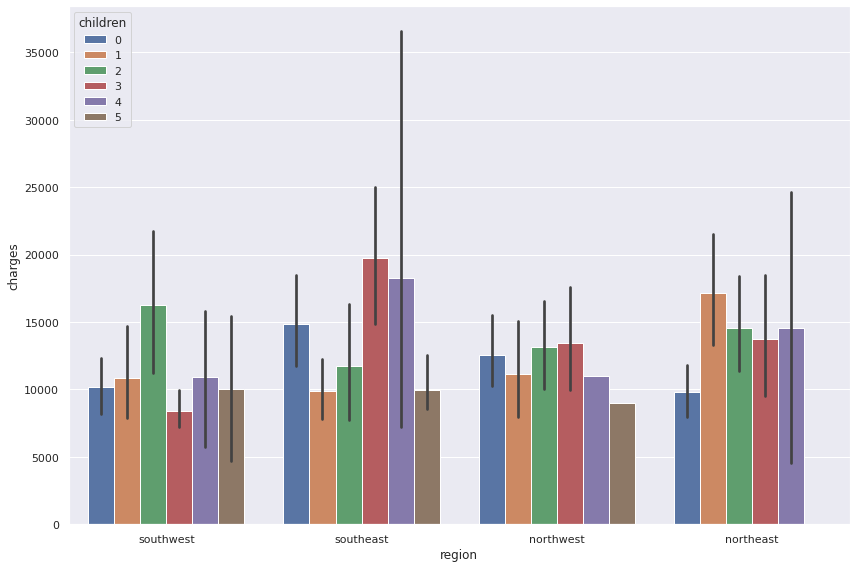

In [ ]:
plt.figure(figsize= (12, 8))
sns.barplot(x="region", y="charges", hue="children", data=women_only)
plt.show()


Breakdown by number of children, charges, and region and men who are parents

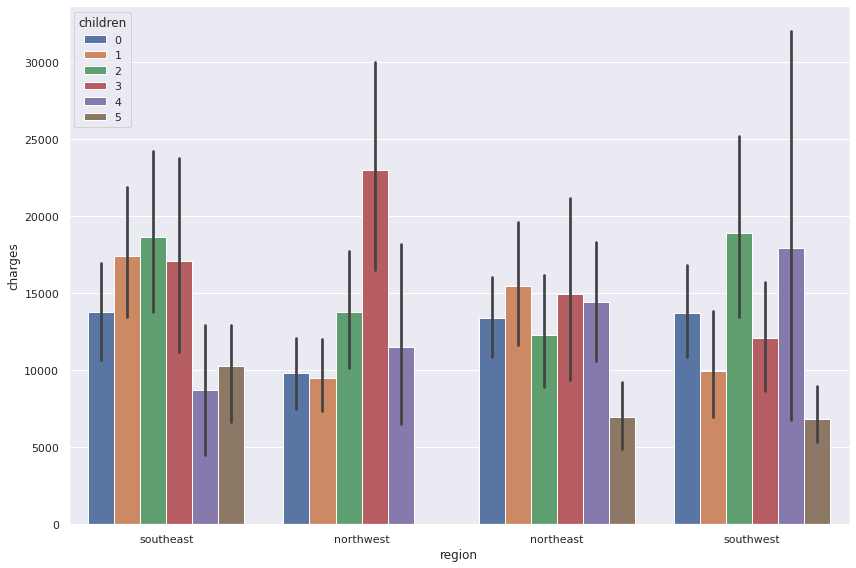

In [ ]:
plt.figure(figsize= (12, 8))

sns.barplot(x="region", y="charges", hue="children", data=men_only)
plt.show()

let's create dataframes based on regions. ex:
AL_NL_batting2008 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 2008).values]

What regions are there?

In [ ]:
insurance_regions = insurance['region'].value_counts()
print(insurance_regions)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
southwest = insurance.iloc[(insurance['region']=='southwest').values]
southwest.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884
12,23,male,34.4,0,no,southwest,1826
15,19,male,24.6,1,no,southwest,1837
18,56,male,40.3,0,no,southwest,10602
19,30,male,35.3,0,yes,southwest,36837


In [ ]:
southwest["charges"].describe()

count      325.000000
mean     12346.452308
std      11557.180203
min       1241.000000
25%       4751.000000
50%       8798.000000
75%      13462.000000
max      52590.000000
Name: charges, dtype: float64

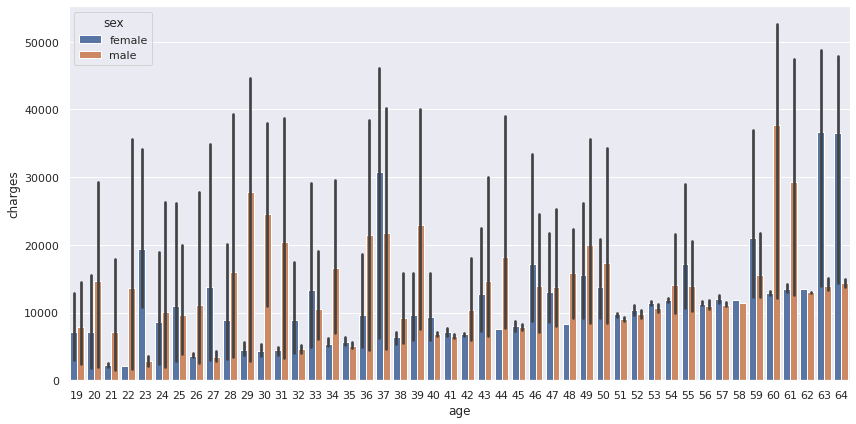

In [ ]:
plt.figure(figsize= (12, 6))
ax = sns.barplot(x="age", y="charges", hue= "sex", data=southwest)
plt.show()

Barf. choose another plot.

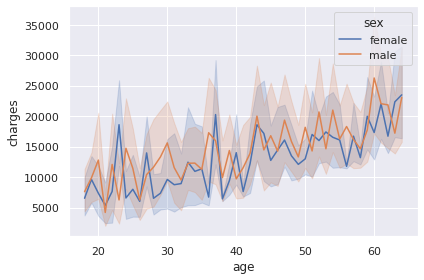

In [ ]:
sns.lineplot(x='age', y='charges', hue = 'sex', data=insurance);


Linerar relationship between age, sex & charges.

In [ ]:
southeast = insurance.iloc[(insurance['region']=='southeast').values]
southeast.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
11,62,female,26.29,0,yes,southeast,27808.7251


In [ ]:
northwest = insurance.iloc[(insurance['region']=='northwest').values]
northwest.head()

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
24,37,male,28.025,2,no,northwest,6203.90175


In [ ]:
northeast = insurance.iloc[(insurance['region']=='northeast').values]
northeast.head()

,age,sex,bmi,children,smoker,region,charges
8,37,male,29.830,2,no,northeast,6406.41070
10,25,male,26.220,0,no,northeast,2721.32080
16,52,female,30.780,1,no,northeast,10797.33620
17,23,male,23.845,0,no,northeast,2395.17155
20,60,female,36.005,0,no,northeast,13228.84695


In [ ]:
northeast['bmi'].mean()

29.17350308641976

Does one region have higher charges? let's plot to see.

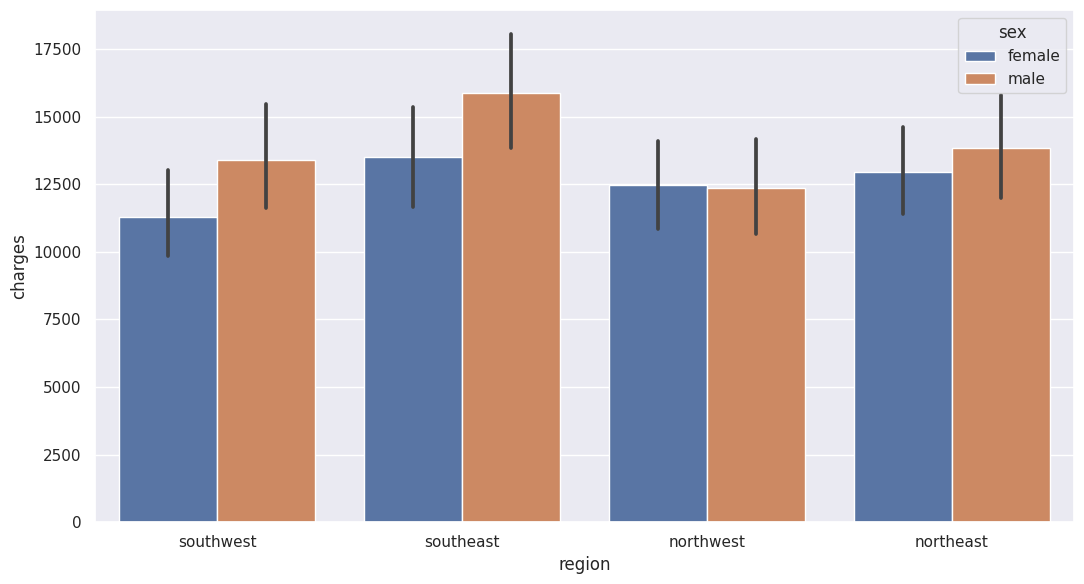

In [ ]:
plt.figure(figsize= (11, 6))
ax = sns.barplot(x="region", y="charges", hue= "sex", data=insurance)
plt.show()

Let's see what the BMI is by region and then test the means to see if there's any significant differences. Let's also visualize them

In [ ]:
southwest['bmi'].describe()

count    325.000000
mean      30.596615
std        5.691836
min       17.400000
25%       26.900000
50%       30.300000
75%       34.600000
max       47.600000
Name: bmi, dtype: float64

In [ ]:
southwest_highbmi = southwest.iloc[(southwest['bmi']>=25).values]
print(southwest_highbmi)

      age     sex   bmi  children smoker     region      charges
0      19  female  27.9         0    yes  southwest  16884.92400
12     23    male  34.4         0     no  southwest   1826.84300
18     56    male  40.3         0     no  southwest  10602.38500
19     30    male  35.3         0    yes  southwest  36837.46700
21     30  female  32.4         1     no  southwest   4149.73600
...   ...     ...   ...       ...    ...        ...          ...
1313   19  female  34.7         2    yes  southwest  36397.57600
1329   52    male  38.6         2     no  southwest  10325.20600
1331   23  female  33.4         0     no  southwest  10795.93733
1332   52  female  44.7         3     no  southwest  11411.68500
1336   21  female  25.8         0     no  southwest   2007.94500

[274 rows x 7 columns]


In [ ]:
southeast['bmi'].describe()

count    364.000000
mean      33.355989
std        6.477648
min       19.800000
25%       28.572500
50%       33.330000
75%       37.812500
max       53.130000
Name: bmi, dtype: float64

In [ ]:
northeast['bmi'].describe()

count    324.000000
mean      29.173503
std        5.937513
min       15.960000
25%       24.866250
50%       28.880000
75%       32.893750
max       48.070000
Name: bmi, dtype: float64

In [ ]:
northwest['bmi'].describe()

count    325.000000
mean      29.199785
std        5.136765
min       17.385000
25%       25.745000
50%       28.880000
75%       32.775000
max       42.940000
Name: bmi, dtype: float64

code to t-test:
stats.ttest_ind(Positive['HR'], NoPEDs['HR'])



In [ ]:
stats.ttest_ind(southwest['bmi'], southeast['bmi'])


Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)

so there is a significant p value (scientific number)

In [ ]:
stats.ttest_ind(southwest['charges'], southeast['charges'])


Ttest_indResult(statistic=-2.428177355666804, pvalue=0.015430651095691356)

In [ ]:
sample_1_n = southwest.shape[0]
sample_2_n = southeast.shape[0]
sample_1_mean = southwest['bmi'].mean()
sample_2_mean = southeast['bmi'].mean()
sample_1_var = southwest['bmi'].var()
sample_2_var = southeast['bmi'].var()

print("the mean bmi in the southwest is " + str(sample_1_mean))

the mean bmi in the southwest is 30.59661538461538


In [ ]:
print("the mean bmi in the southeast is " + str(sample_2_mean))

the mean bmi in the southeast is 33.35598901098903


In [ ]:
#define a function b/c you'll use this again
#southwest is sample_1
#southeast is sample_2
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means of bmi's at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(southwest['bmi'],southeast['bmi'])

"The difference in means of bmi's at the 95% confidence interval (two-tail) is between 1.8506486875935768 and 3.6680985651537195."

That diff doesn't seem right. let me think on that.

let's see the strength of the relationship between the variables.

In [ ]:
#define Cohen's d function, you'll use again
def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled

    return("Cohen's d is: "+str(cohens)+ ".")

get_cohens_d(southwest['bmi'], southeast['bmi'])

"Cohen's d is: -0.4525481755894482."

that's a small-medium strength of relationship between the variables.

let's see if there's a sig diff between southeast & northeast bmi

In [ ]:
stats.ttest_ind(southeast['bmi'], northeast['bmi'])

Ttest_indResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17)

In [ ]:
sample_1_n = southeast.shape[0]
sample_2_n = northeast.shape[0]
sample_1_mean = southeast['bmi'].mean()
sample_2_mean = northeast['bmi'].mean()
sample_1_var = southeast['bmi'].var()
sample_2_var = northeast['bmi'].var()

print("the mean bmi in the southeast is " + str(sample_1_mean))

the mean bmi in the southeast is 33.35598901098903


In [ ]:
print("the mean bmi in the northeast is " + str(sample_2_mean))

the mean bmi in the northeast is 29.17350308641976


In [ ]:
#what's the diff in the means?
get_95_ci(southeast['bmi'],northeast['bmi'])

"The difference in means of bmi's at the 95% confidence interval (two-tail) is between -5.110299811934901 and -3.2546720372036333."

In [ ]:
#what's the cohen's d?
get_cohens_d(southeast['bmi'], northeast['bmi'])

"Cohen's d is: 0.6731339529932875."

that's a medium effect. that's good.

How about Southwest & Northeast?

In [ ]:
get_95_ci(southwest['bmi'],northeast['bmi'])

"The difference in means of bmi's at the 95% confidence interval (two-tail) is between -2.3180661998682126 and -0.5281583965230252."

In [ ]:
sample_1_n = southwest.shape[0]
sample_2_n = northeast.shape[0]
sample_1_mean = southwest['bmi'].mean()
sample_2_mean = northeast['bmi'].mean()
sample_1_var = southwest['bmi'].var()
sample_2_var = northeast['bmi'].var()

print("the mean bmi in the southwest is " + str(sample_1_mean))

the mean bmi in the southwest is 30.59661538461538


In [ ]:
print("the mean bmi in the northeast is " + str(sample_2_mean))

the mean bmi in the northeast is 29.17350308641976


Smokers by region?

In [ ]:
southeast.head(2)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
#northeast = insurance.iloc[(insurance['region']=='northeast').values]
southeast_smoker_yes = southeast.iloc[(southeast['smoker']=='yes').values]
southeast_smoker_yes.count()


age         91
sex         91
bmi         91
children    91
smoker      91
region      91
charges     91
dtype: int64

In [ ]:
southeast_smoker_no = southeast.iloc[(southeast['smoker']=='no').values]
southeast_smoker_no.count()

age         273
sex         273
bmi         273
children    273
smoker      273
region      273
charges     273
dtype: int64

let's visualize some bmi data between regions

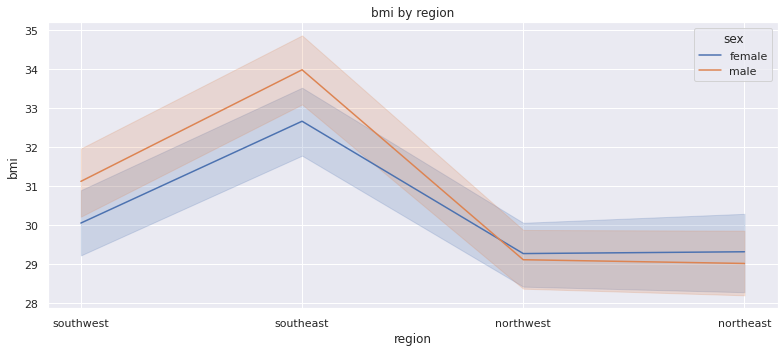

In [ ]:
plt.figure(figsize= (11, 5))
ax = sns.lineplot(x="region", y="bmi", hue= "sex", data=insurance)
plt.title("bmi by region")

plt.show()

You can concat two dfs by using this argument in the ax= :
data=pd.concat([NL_batting98_2008, AL_batting98_2008])

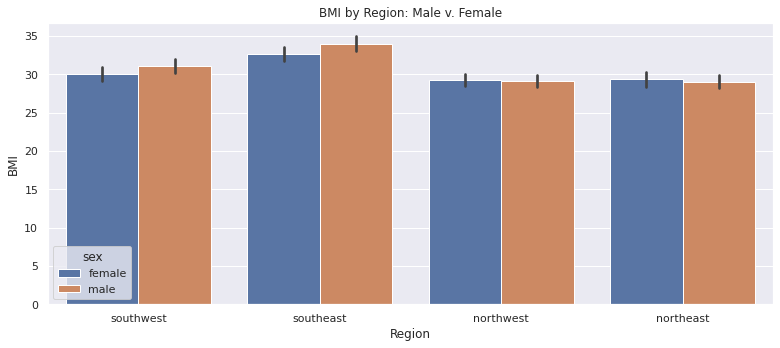

In [ ]:
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="bmi", hue= "sex", data=insurance)
plt.xlabel("Region")
plt.ylabel("BMI")
plt.title("BMI by Region: Male v. Female")
plt.show()

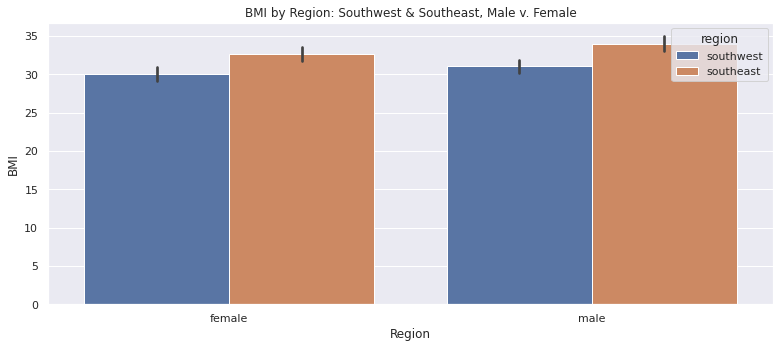

In [ ]:
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="sex", y="bmi", hue= "region", data=pd.concat([southwest, southeast]))
plt.xlabel("Region")
plt.ylabel("BMI")
plt.title("BMI by Region: Southwest & Southeast, Male v. Female")
plt.show()

Median charges by sex.

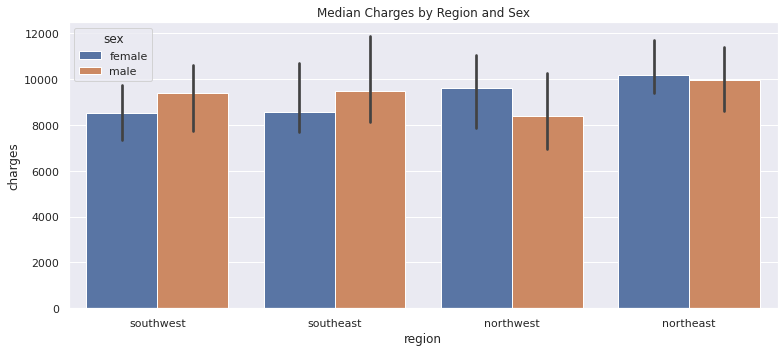

In [ ]:
from numpy import median
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="charges", hue= "sex", estimator= median, data=insurance)
plt.title('Median Charges by Region and Sex')
plt.show()

Median charges by region and smoker status

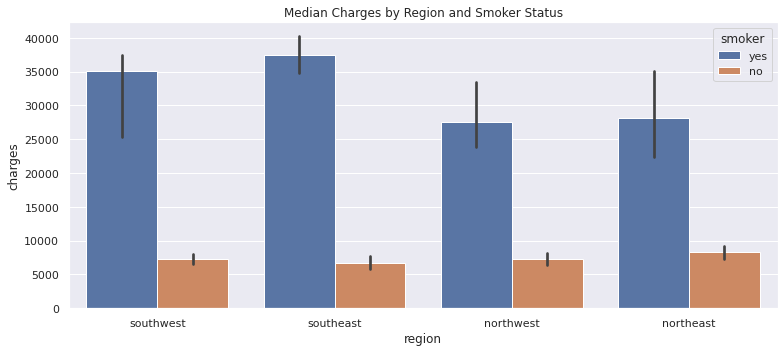

In [ ]:
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="charges", hue= "smoker", estimator= median, data=insurance)
plt.title('Median Charges by Region and Smoker Status')
plt.show()

Charges by region considering sex
charges by region considering children


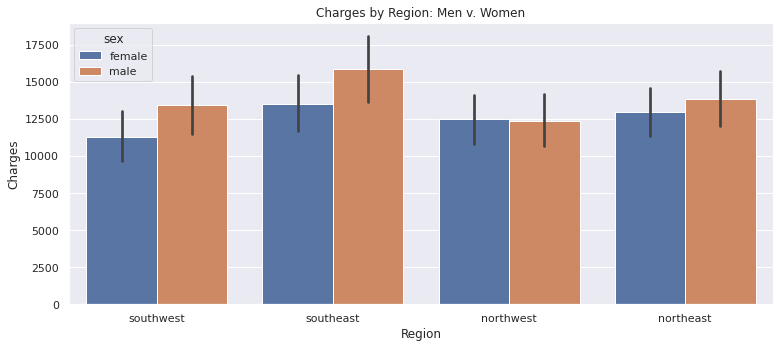

In [ ]:
#sns.axes_style('white')
sns.set_style="white"

plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="charges", hue= "sex", data=insurance)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title("Charges by Region: Men v. Women")
plt.show()

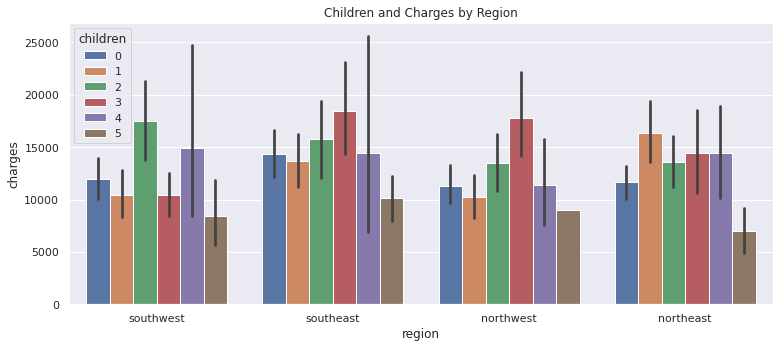

In [ ]:
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="charges", hue= "children", data=insurance)
plt.title("Children and Charges by Region")
plt.show()

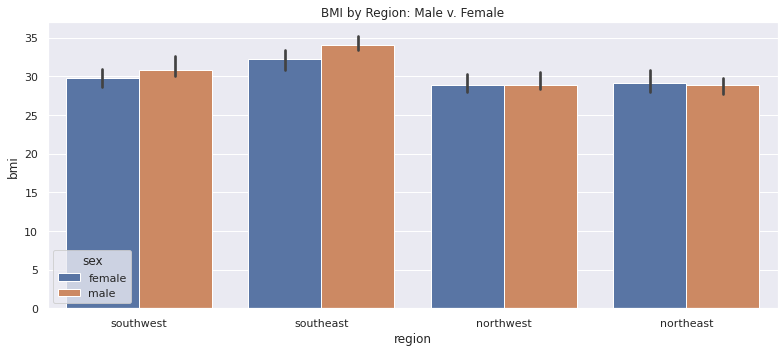

In [ ]:
#set_style("whitegrid")
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="bmi", hue= "sex", estimator=median, data=insurance)
plt.title("BMI by Region: Male v. Female")
plt.show()

separate out the data by number of children for analysis of costs?


In [ ]:
one_child = insurance[insurance['children'] == 1]
one_child.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
6,46,female,33.44,1,no,southeast,8240.5896
15,19,male,24.60,1,no,southwest,1837.2370
16,52,female,30.78,1,no,northeast,10797.3362
21,30,female,32.40,1,no,southwest,4149.7360


In [ ]:
one_child.describe()

,age,bmi,children,charges
count,324.000000,324.000000,324.0,324.000000
mean,39.453704,30.623148,1.0,12731.171832
std,12.067445,6.101435,0.0,11823.631451
min,18.000000,16.815000,1.0,1711.026800
25%,30.000000,26.615000,1.0,4791.643175
50%,40.000000,30.015000,1.0,8483.870150
75%,49.000000,34.237500,1.0,15632.052050
max,64.000000,52.580000,1.0,58571.074480
